## Homework 01. Simple text processing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython import display

### Toxic or not
Your main goal in this assignment is to classify, whether the comments are toxic or not. And practice with both classical approaches and PyTorch in the process.

*Credits: This homework is inspired by YSDA NLP_course.*

*Disclaimer: The used dataset may contain obscene language and is used only as an example of real unfiltered data.*

In [2]:
# In colab uncomment this cell
! wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/homeworks/homework01/utils.py -nc

--2021-03-28 05:50:20--  https://raw.githubusercontent.com/neychev/made_nlp_course/master/homeworks/homework01/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579 [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]     579  --.-KB/s    in 0s      

2021-03-28 05:50:21 (11.6 MB/s) - ‘utils.py’ saved [579/579]



In [3]:
try:
    data = pd.read_csv('../../datasets/comments_small_dataset/comments.tsv', sep='\t')
except FileNotFoundError:
    ! wget https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/comments_small_dataset/comments.tsv -nc
    data = pd.read_csv("comments.tsv", sep='\t')

--2021-03-28 05:50:21--  https://raw.githubusercontent.com/neychev/made_nlp_course/master/datasets/comments_small_dataset/comments.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353358 (345K) [text/plain]
Saving to: ‘comments.tsv’

comments.tsv        100%[===================>] 345.08K  --.-KB/s    in 0.02s   

2021-03-28 05:50:21 (14.4 MB/s) - ‘comments.tsv’ saved [353358/353358]



In [4]:
texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [5]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

Generally, library `nltk` [link](https://www.nltk.org) is widely used in NLP. It is not necessary in here, but mentioned to intoduce it to you.

In [6]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "I don\'t want to do that" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "I don't want to do that" with "Ok, great!".
after: how to be a grown-up at work : replace " i don't want to do that " with " ok , great ! " .


In [7]:
# task: preprocess each comment in train and test

texts_train = [preprocess(txt) for txt in texts_train]#<YOUR CODE>
texts_test = [preprocess(txt) for txt in texts_test]#<YOUR CODE>

In [8]:
# Small check that everything is done properly
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Step 1: bag of words

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. __Please don't do that in the current assignment, though.__
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [9]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)
k = min(10000, len(set(' '.join(texts_train).split())))

#<YOUR CODE>
import re
from collections import Counter

# iterator = re.finditer(pattern="\w+", string=txt)
# generator = (
#     obj.group(0) for txt in texts_train
#     for obj in re.finditer(pattern="\w+", string=txt)
# )

# если токенизировать строго слова (т.е. \w+) то токенов меньше чем k
# что намекает на оверкил, поэтому решил просто использовать стандартный сплит
generator = (
    tok for txt in texts_train
    for tok in txt.split()
)
counter = Counter(generator)
bow_vocabulary = sorted([token for token, _ in counter.most_common(n=k)])#<YOUR CODE>

print('example features:', sorted(bow_vocabulary)[::100])


example features: ['!', '12:20', '300', '_', 'adorned', 'alternative', 'archive', 'average', 'benkner', 'bout', 'came', 'chest', 'combined', 'consumers', 'cricket', 'decisions', 'dickheads', 'domestic', 'eductaion', 'essentially', 'faggot', 'firms', 'frustrated', 'goal', 'hanibal', 'hip-hop', 'identified', 'infoboxes', 'issue', 'kindergarten', 'lets', 'lot', "mclaren's", 'moderator', 'naturally', 'noticeable', 'opposing', 'pdf', 'plant', 'pretoria', 'punctuation', 'rebels', 'repetative', 'riadh', 'schulz', 'shes', 'slit', 'spoof', 'stupid', 't', 'theoretical', 'topic', 'uglyness', 'userspace', 'wanted', 'wikieditor', 'year', 'ீ']


In [10]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    #<YOUR CODE>
    # return np.array(<...>, 'float32')
    tokens = text.split()
    result = [tokens.count(x) for x in bow_vocabulary]
    
    return np.array(result, 'float32')


In [11]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [12]:
# Small check that everything is done properly
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

Now let's do the trick with `sklearn` logistic regression implementation:

In [13]:
from sklearn.linear_model import LogisticRegression
bow_model = LogisticRegression().fit(X_train_bow, y_train)

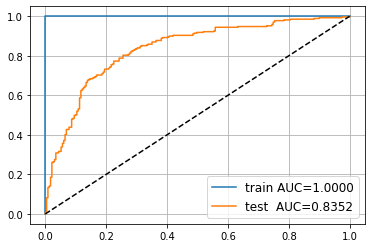

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

Seems alright. Now let's create the simple logistic regression using PyTorch. Just like in the classwork.

In [15]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

from sklearn.metrics import accuracy_score

In [16]:
from utils import plot_train_process

In [17]:
model = nn.Sequential()

model.add_module('l1', nn.Linear(X_train_bow.shape[1], 2)) ### YOUR CODE HERE

### YOUR CODE HERE
# model.add_module("flatten", nn.Flatten(0,1))
model.add_module("sigmoid", nn.Sigmoid())
model.train()
# model(X_train_bow_torch[:3])
# lr_scheduler = StepLR()

Sequential(
  (l1): Linear(in_features=5722, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)

Remember what we discussed about loss functions! `nn.CrossEntropyLoss` combines both log-softmax and `NLLLoss`.

__Be careful with it! Criterion `nn.CrossEntropyLoss` with still work with log-softmax output, but it won't allow you to converge to the optimum.__ Next comes small demonstration:

In [18]:
# loss_function = nn.NLLLoss()
loss_function = nn.CrossEntropyLoss()

In [19]:
opt = torch.optim.Adam(model.parameters()) ### YOUR CODE HERE
lr_scheduler = StepLR(opt, step_size=20)

In [20]:
X_train_bow_torch = torch.tensor(X_train_bow) ### YOUR CODE HERE
X_test_bow_torch = torch.tensor(X_test_bow) ### YOUR CODE HERE

y_train_torch = torch.tensor(y_train)#.view(-1, 1) ### YOUR CODE HERE
y_test_torch = torch.tensor(y_test)#.view(-1, 1) ### YOUR CODE HERE


Let's test that everything is fine

In [21]:
# example loss
loss = loss_function(model(X_train_bow_torch[:3]), y_train_torch[:3])

In [22]:
assert type(loss.item()) == float

Here comes small function to train the model. In future we will take in into separate file, but for this homework it's ok to implement it here. 

In [23]:
def train_model(
    model,
    opt,
    lr_scheduler,
    X_train_torch,
    y_train_torch,
    X_val_torch,
    y_val_torch,
    n_iterations=500,
    batch_size=32,
    warm_start=False,
    show_plots=True,
    eval_every=10
):
    if not warm_start:
        for name, module in model.named_children():
            print('resetting ', name)
            try:
                module.reset_parameters()
            except AttributeError as e:
                print('Cannot reset {} module parameters: {}'.format(name, e))

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    local_train_loss_history = []
    local_train_acc_history = []
    for i in range(n_iterations):

        # sample 256 random observations
        ix = np.random.randint(0, len(X_train_torch), batch_size)
        x_batch = X_train_torch[ix]
        y_batch = y_train_torch[ix]

        # predict log-probabilities or logits
        y_predicted = model(x_batch)### YOUR CODE

        # compute loss, just like before
        ### YOUR CODE
        loss = loss_function(y_predicted, y_batch)

        # compute gradients
        ### YOUR CODE
        loss.backward()

        # Adam step
        ### YOUR CODE
        opt.step()

        # clear gradients
        ### YOUR CODE
        opt.zero_grad()

        local_train_loss_history.append(loss.data.numpy())
        local_train_acc_history.append(
            accuracy_score(
                y_batch.to('cpu').detach().numpy(),
                y_predicted.to('cpu').detach().numpy().argmax(axis=1)
            )
        )

        if i % eval_every == 0:
            train_loss_history.append(np.mean(local_train_loss_history))
            train_acc_history.append(np.mean(local_train_acc_history))
            local_train_loss_history, local_train_acc_history = [], []

            predictions_val = model(X_val_torch)
            val_loss_history.append(loss_function(predictions_val, y_val_torch).to('cpu').detach().item())

            acc_score_val = accuracy_score(y_val_torch.cpu().numpy(), predictions_val.to('cpu').detach().numpy().argmax(axis=1))
            val_acc_history.append(acc_score_val)
            lr_scheduler.step(train_loss_history[-1])

            if show_plots:
                display.clear_output(wait=True)
                plot_train_process(train_loss_history, val_loss_history, train_acc_history, val_acc_history)
    return model

Let's run it on the data. Note, that here we use the `test` part of the data for validation. It's not so good idea in general, but in this task our main goal is practice.

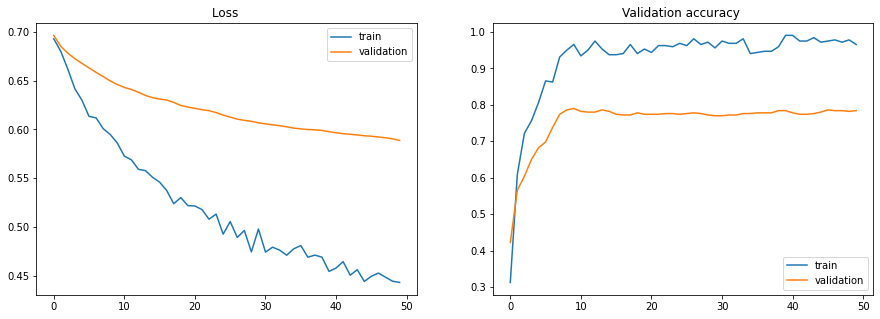

Sequential(
  (l1): Linear(in_features=5722, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)

In [24]:
train_model(model, opt, lr_scheduler, X_train_bow_torch, y_train_torch, X_test_bow_torch, y_test_torch)

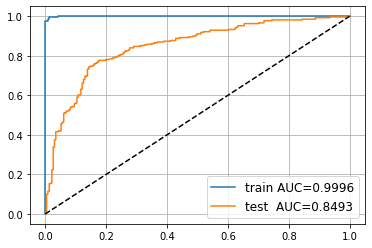

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow_torch, y_train, model),
    ('test ', X_test_bow_torch, y_test, model)
]:
    proba = model(X).detach().cpu().numpy()[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

Try to vary the number of tokens `k` and check how the model performance changes. Show it on a plot.

resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


resetting  0
resetting  1
Cannot reset 1 module parameters: 'Sigmoid' object has no attribute 'reset_parameters'


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Text(0.5, 0, 'vocabulary')

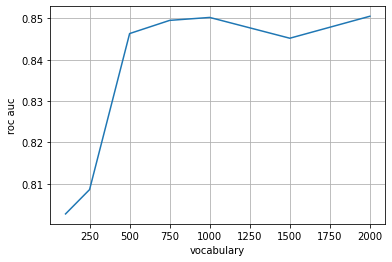

In [26]:
# Your beautiful code here

def get_voc_vec(texts:list, k):
    generator = (tok for txt in texts_train for tok in txt.split())
    counter = Counter(generator)
    bow_vocabulary = sorted([token for token, _ in counter.most_common(n=k)])
    return bow_vocabulary

def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    tokens = text.split()
    result = [tokens.count(x) for x in bow_vocabulary]
    return np.array(result, 'float32')

def prepare_data(texts_train, texts_test, y_train, y_test):
    X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
    X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

    X_train_bow_torch = torch.tensor(X_train_bow)
    X_test_bow_torch = torch.tensor(X_test_bow) 
    y_train_torch = torch.tensor(y_train)
    y_test_torch = torch.tensor(y_test)
    return (
        X_train_bow_torch, X_test_bow_torch, 
        y_train_torch, y_test_torch
    )

def build_model(in_features):
    model = nn.Sequential(
        nn.Linear(in_features, 2),
        nn.Sigmoid()
    )
    model.train()
    loss_function = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters())
    lr_scheduler = StepLR(opt, step_size=20)
    return model, loss_function, opt


x=[]
y=[]

for k in [100, 250, 500, 750, 1000, 1500, 2000]:
  bow_vocabulary = get_voc_vec(texts_train, k)
  X_train_bow_torch, X_test_bow_torch, y_train_torch, y_test_torch = \
      prepare_data(texts_train, texts_test, y_train, y_test)
  model, loss_function, opt = build_model(in_features=k)
  train_model(
      model, opt, lr_scheduler, 
      X_train_bow_torch, y_train_torch, X_test_bow_torch, y_test_torch,
      show_plots=False
  )
  proba = model(X_test_bow_torch).detach().cpu().numpy()[:, 1]
  auc = roc_auc_score(y_test_torch, proba)

  x.append(k)
  y.append(auc)

plt.plot(x,y)
plt.grid()
plt.ylabel("roc auc")
plt.xlabel("vocabulary")

### Step 2: implement TF-IDF features

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequence__ and means exactly that:

$$ feature_i = { Count(word_i \in x) \times { log {N \over Count(word_i \in D) + \alpha} }}, $$


where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1). 
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate ROC curve. Compare it with basic BagOfWords model from above.

__Please don't use sklearn/nltk builtin tf-idf vectorizers in your solution :)__ You can still use 'em for debugging though.

Blog post about implementing the TF-IDF features from scratch: https://triton.ml/blog/tf-idf-from-scratch

In [27]:
# Your beautiful code here

from scipy.sparse import csr_matrix,save_npz
from collections import defaultdict

def get_voc_vec(texts:list, k):
    generator = (tok for txt in texts_train for tok in txt.split())
    counter = Counter(generator)
    bow_vocabulary = sorted([token for token, _ in counter.most_common(n=k)])
    return bow_vocabulary

def clean_corpus(corpus, vocabulary):
    """
    removes unsignificant tokens (not in vocabulary)
    """
    return [
        " ".join([token for token in doc.split() if token in vocabulary])
        for doc in corpus
    ]

def get_idf(corpus, vocabulary):
    """
    returns inversed document frequencies
    """
    n = len(corpus)
    m = len(vocabulary)
    corpus2 = [set(doc.split()) for doc in corpus]
    idf_dict = dict()
    for col, token in enumerate(vocabulary):
        count = 0
        for row, doc in enumerate(corpus2):
            if token in doc:
                count += 1
        idf_dict[token] = np.log(n/count)+1
    return idf_dict

def get_tf(document, vocabulary):
    tf_dict = dict()
    tokens = document.split()
    n = len(tokens)
    for token in vocabulary:
        tf_dict[token] = tokens.count(token)
    return {k:v if n!=0 else 0 for k,v in tf_dict.items()}

def get_tfidf(corpus, vocabulary, idf_dict, verbose=False):
    n, m = len(corpus), len(vocabulary)
    mat = np.zeros(shape=(n,m))
    for row, document in enumerate(corpus):
        tf_dict = get_tf(document, vocabulary)
        for col, token in enumerate(vocabulary):
            mat[row, col] = tf_dict[token] * idf_dict[token]
    # denom = np.abs(mat).sum(axis=1, keepdims=True)
    return mat #/ denom


k=1000 # best choice

# working with texts
bow_vocabulary = get_voc_vec(texts_train, k)
vocabulary = set(bow_vocabulary)
cleaned_train = clean_corpus(texts_train, vocabulary)
cleaned_test = clean_corpus(texts_test, vocabulary)

# working with vectors
idf_dict = get_idf(cleaned_train, bow_vocabulary)
tfidf_train = get_tfidf(cleaned_train, bow_vocabulary, idf_dict=idf_dict)
tfidf_test = get_tfidf(cleaned_test, bow_vocabulary, idf_dict=idf_dict)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=None,smooth_idf=False, norm=None)
tfidf_ = vec.fit_transform(cleaned_train).todense()
idf_ = {tok:vec.idf_[idx] for tok, idx in vec.vocabulary_.items()}
# {tok:vec.idf_[idx] for tok, idx in vec.vocabulary_.items()}

w = "kind"
print(
    f"result of custom tfidf for word '{w}':",
    dict(zip(bow_vocabulary, tfidf_train.tolist()[0]))[w]
)
print(
    f"result of sklearn tfidf for word '{w}':",
    {tok:np.asarray(tfidf_)[0][idx] for tok, idx in vec.vocabulary_.items()}[w]
)


# from google.colab import drive
# drive.mount('/content/drive')

result of custom tfidf for word 'kind': 4.649658740960655
result of sklearn tfidf for word 'kind': 4.649658740960655


Same stuff about moel and optimizers here (or just omit it, if you are using the same model as before).

In [29]:
### YOUR CODE HERE
model, loss_function, opt = build_model(in_features=k)


In [30]:
X_train_tfidf_torch = torch.tensor(tfidf_train) ### YOUR CODE HERE
X_test_tfidf_torch = torch.tensor(tfidf_test) ### YOUR CODE HERE

y_train_torch =  torch.tensor(y_train) ### YOUR CODE HERE
y_test_torch =  torch.tensor(y_test) ### YOUR CODE HERE

Fit your model to the data. No not hesitate to vary number of iterations, learning rate and so on.

_Note: due to very small dataset, increasing the complexity of the network might not be the best idea._

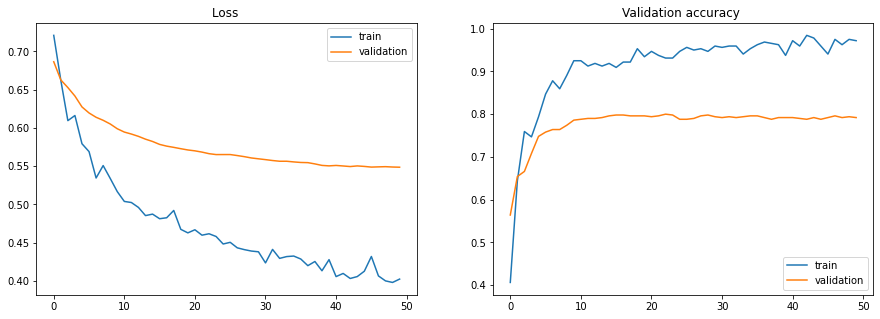

0.8446869116014097

In [31]:
train_model(
    model, opt, StepLR(opt, step_size=1), 
    X_train_tfidf_torch.float(), y_train_torch,
    X_test_tfidf_torch.float(), y_test_torch
    # X_train_bow_torch, y_train_torch, X_test_bow_torch, y_test_torch
)
proba = model(X_test_tfidf_torch.float()).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)

### Step 3: Comparing it with Naive Bayes

Naive Bayes classifier is a good choice for such small problems. Try to tune it for both BOW and TF-iDF features. Compare the results with Logistic Regression.

In [32]:
# Your beautiful code here
from sklearn.naive_bayes import BernoulliNB, GaussianNB, ComplementNB

est = BernoulliNB(alpha=1e-4)
est.fit(X_train_bow_torch, y_train_torch)
proba = est.predict_proba(X_test_bow_torch)[:,1]
print(f"ber naive bow:{roc_auc_score(y_true=y_test, y_score=proba)}")
est = BernoulliNB(alpha=1e-5)
est.fit(X_train_tfidf_torch, y_train_torch)
proba = est.predict_proba(X_test_tfidf_torch)[:,1]
print(f"ber naive tfidf:{roc_auc_score(y_true=y_test, y_score=proba)}")

est = GaussianNB()
est.fit(X_train_bow_torch, y_train_torch)
proba = est.predict_proba(X_test_bow_torch)[:,1]
print(f"gauss naive bow:{roc_auc_score(y_true=y_test, y_score=proba)}")
est = GaussianNB()
est.fit(X_train_tfidf_torch, y_train_torch)
proba = est.predict_proba(X_test_tfidf_torch)[:,1]
print(f"gauss naive tfidf:{roc_auc_score(y_true=y_test, y_score=proba)}")

est = ComplementNB(alpha=0.25)
est.fit(X_train_bow_torch, y_train_torch)
proba = est.predict_proba(X_test_bow_torch)[:,1]
print(f"gauss naive bow:{roc_auc_score(y_true=y_test, y_score=proba)}")
est = ComplementNB(0.5)
est.fit(X_train_tfidf_torch, y_train_torch)
proba = est.predict_proba(X_test_tfidf_torch)[:,1]
print(f"gauss naive tfidf:{roc_auc_score(y_true=y_test, y_score=proba)}")


ber naive bow:0.8102158064983345
ber naive tfidf:0.8230579829092841
gauss naive bow:0.684425240187322
gauss naive tfidf:0.6281723233396095
gauss naive bow:0.8425626418191474
gauss naive tfidf:0.8314826437503018


Shape some thoughts on the results you aquired. Which model has show the best performance? Did changing the learning rate/lr scheduler help?

- The best model is Logistic regression with TF-IDF
- Work with LR Scheduler helped the most to achive performance
- NB is good, espetially GaussianNB with BOW, it usefull when we pushed for resourses (RAM, CPU, speed)

### Step 4: Using the external knowledge.

Use the `gensim` word2vec pretrained model to translate words into vectors. Use several models with this new encoding technique. Compare the results, share your thoughts.

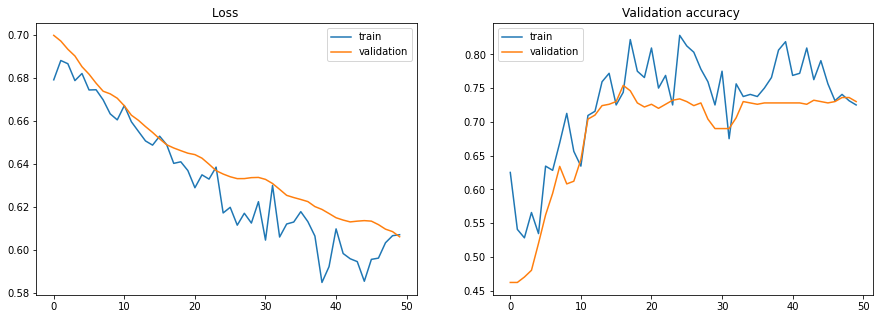

model was trained


0.8429649656415457

In [48]:
# # Your beautiful code here
import gensim.downloader as api
w2v_model = api.load('glove-twitter-100')
print("w2v was loaded")
def get_mean_vector(word2vec_model, words, vocabulary):
    words = [
        word for word in words.split() 
        if word in word2vec_model.vocab
    ]
    # print(words)
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return [0]*w2v_model.vector_size

X_w2v_train = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc, vocabulary=vocabulary)
      for doc in cleaned_train
    ]
)
print("train w2v was built")
X_w2v_test = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc, vocabulary=vocabulary)
      for doc in cleaned_test
    ]
)
print("train w2v was built")
X_w2v_train_torch = torch.tensor(X_w2v_train).float()
X_w2v_test_torch = torch.tensor(X_w2v_test).float()
model, loss_function, opt = build_model(in_features=X_w2v_train_torch.shape[1])
print("model was built")
train_model(
    model, opt, StepLR(opt, step_size=10), 
    X_w2v_train_torch, y_train_torch,
    X_w2v_test_torch, y_test_torch
)
print("model was trained")
proba = model(X_w2v_test_torch).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)


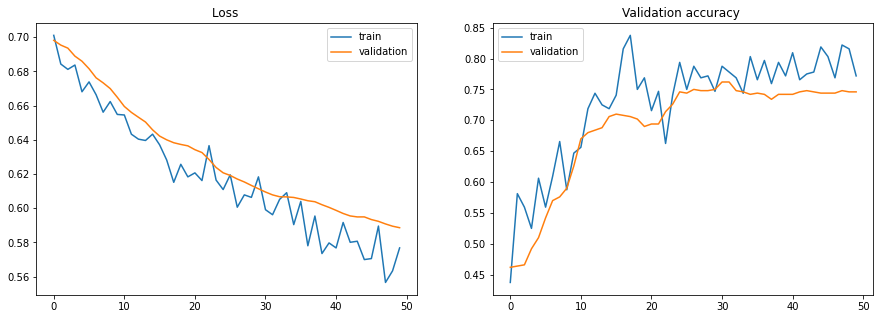

model was trained


0.8521379487922239

In [49]:
# # Your beautiful code here
import gensim.downloader as api
w2v_model = api.load('glove-twitter-200')
print("w2v was loaded")
def get_mean_vector(word2vec_model, words):
    words = [word for word in words.split() if word in word2vec_model.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return [0]*w2v_model.vector_size

X_w2v_train = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_train
    ]
)
print("train w2v was built")
X_w2v_test = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_test
    ]
)
print("train w2v was built")
X_w2v_train_torch = torch.tensor(X_w2v_train).float()
X_w2v_test_torch = torch.tensor(X_w2v_test).float()
model, loss_function, opt = build_model(in_features=X_w2v_train_torch.shape[1])
print("model was built")
train_model(
    model, opt, StepLR(opt, step_size=10), 
    X_w2v_train_torch, y_train_torch,
    X_w2v_test_torch, y_test_torch
)
print("model was trained")
proba = model(X_w2v_test_torch).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)


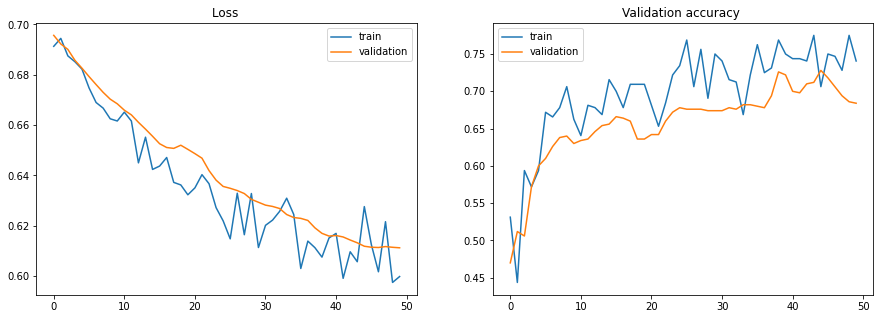

0.8028935129306877

In [50]:
# Your beautiful code here
import gensim.downloader as api
w2v_model = api.load("glove-wiki-gigaword-100")

def get_mean_vector(word2vec_model, words):
    words = [
        word for word in words.split()
        if word in word2vec_model.vocab
    ]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return [0]*w2v_model.vector_size

X_w2v_train = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_train
    ]
)
X_w2v_test = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_test
    ]
)

X_w2v_train_torch = torch.tensor(X_w2v_train).float()
X_w2v_test_torch = torch.tensor(X_w2v_test).float()

model, loss_function, opt = build_model(in_features=X_w2v_train_torch.shape[1])
train_model(
    model, opt, StepLR(opt, 5), 
    X_w2v_train_torch, y_train_torch,
    X_w2v_test_torch, y_test_torch
)
proba = model(X_w2v_test_torch).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)


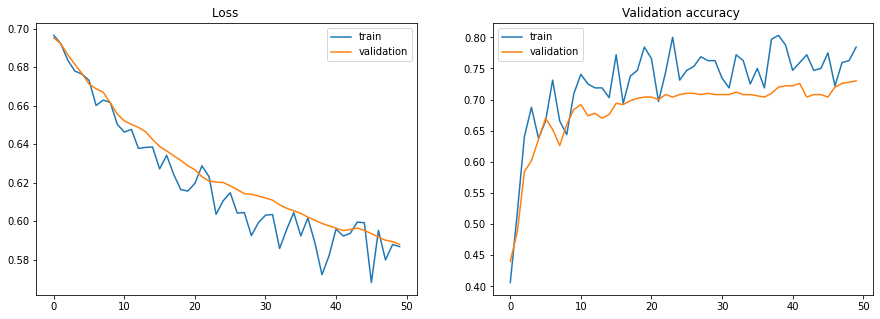

0.8301871610421796

In [51]:
# Your beautiful code here
import gensim.downloader as api
w2v_model = api.load("glove-wiki-gigaword-200")

def get_mean_vector(word2vec_model, words):
    words = [
        word for word in words.split() 
        if word in word2vec_model.vocab
    ]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return [0]*w2v_model.vector_size

X_w2v_train = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_train
    ]
)
X_w2v_test = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_test
    ]
)

X_w2v_train_torch = torch.tensor(X_w2v_train).float()
X_w2v_test_torch = torch.tensor(X_w2v_test).float()

model, loss_function, opt = build_model(in_features=X_w2v_train_torch.shape[1])
train_model(
    model, opt, StepLR(opt, 5), 
    X_w2v_train_torch, y_train_torch,
    X_w2v_test_torch, y_test_torch
)
proba = model(X_w2v_test_torch).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)


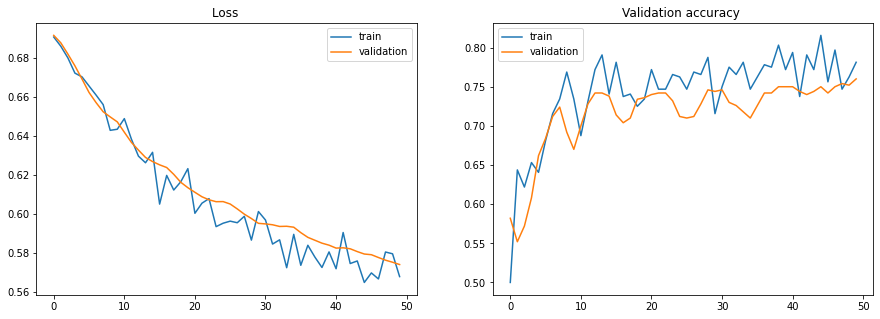

0.8440271005326767

In [52]:
# Your beautiful code here
import gensim.downloader as api
w2v_model = api.load("glove-wiki-gigaword-300")

def get_mean_vector(word2vec_model, words):
    words = [
        word for word in words.split()
        if word in word2vec_model.vocab
    ]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return [0]*w2v_model.vector_size

X_w2v_train = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_train
    ]
)
X_w2v_test = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_test
    ]
)

X_w2v_train_torch = torch.tensor(X_w2v_train).float()
X_w2v_test_torch = torch.tensor(X_w2v_test).float()

model, loss_function, opt = build_model(in_features=X_w2v_train_torch.shape[1])
train_model(
    model, opt, StepLR(opt, 10), 
    X_w2v_train_torch, y_train_torch,
    X_w2v_test_torch, y_test_torch
)
proba = model(X_w2v_test_torch).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)


In [37]:
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz
# !tar -xvf "/content/GoogleNews-vectors-negative300.bin.gz"

--2021-03-28 06:02:23--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.138.104
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.138.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  47.3MB/s    in 34s     

2021-03-28 06:02:58 (46.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]




In [38]:
from gensim import models

w2v_model = models.KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', 
    binary=True
)

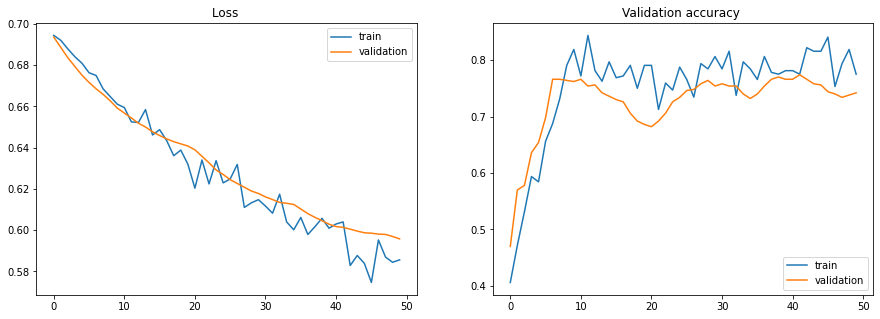

0.8560485363459343

In [47]:
def get_mean_vector(word2vec_model, words):
    words = [word for word in words.split() if word in word2vec_model.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return [0] * w2v_model.vector_size


def build_model(in_features):
    model = nn.Sequential(
        # nn.Linear(in_features, 100),#10
        # nn.ReLU(),
        # nn.Linear(100, 2),
        # nn.Sigmoid()

        nn.Linear(in_features, 2), nn.Sigmoid()
    )
    model.train()
    loss_function = nn.CrossEntropyLoss()
    opt = torch.optim.Adam(model.parameters())
    lr_scheduler = StepLR(opt, step_size=20)
    return model, loss_function, opt


X_w2v_train = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_train
    ]
)
X_w2v_test = np.stack(
    [
      get_mean_vector(word2vec_model=w2v_model, words=doc)
      for doc in cleaned_test
    ]
)

X_w2v_train_torch = torch.tensor(X_w2v_train).float()
X_w2v_test_torch = torch.tensor(X_w2v_test).float()

model, loss_function, opt = build_model(in_features=X_w2v_train_torch.shape[1])
train_model(
    model, opt, ReduceLROnPlateau(opt), 
    X_w2v_train_torch, y_train_torch,
    X_w2v_test_torch, y_test_torch
)
proba = model(X_w2v_test_torch).detach().cpu().numpy()[:, 1]
roc_auc_score(y_true=y_test, y_score=proba)


<center> <b>Twitter dataset (Glove)</b>  </center>

| dim | ROC AUC |
|:-----|:----------:|
| 100 | 0.8429 |
| 200 | 0.8521 |  

<br/>
<br/>
<center> <b>Wikipedia dataset (Glove)</b>  </center>

| dim | ROC AUC |
|:-----|:----------:|
| 100 | 0.8028 |
| 200 | 0.8301 |
| 300 | 0.8440 |


<br/>
<br/>
<center> <b>Google news (W2V)</b>  </center>

| dim | ROC AUC |
|:-----|:----------:|
| 300 | 0.8560 |


- Performance highly depends on vector length.
- We can see a significant differense in performanse between different models of w2v family. There can be different causes: 
 - difference in domain (tweets vs wikipedia articles), 
 - difference in preprocessing (tokenisation, stopwords, lemmatisation, and so on)
  - difference in model learning ways between glove on wiki and glove on tweets.
  - difference in models (w2v vs glove)
- w2v can work better than both tf-idf and bow